<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Jablonski/klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Całkowita liczba przypadków: 569
Liczba przypadków złośliwego raka: 357


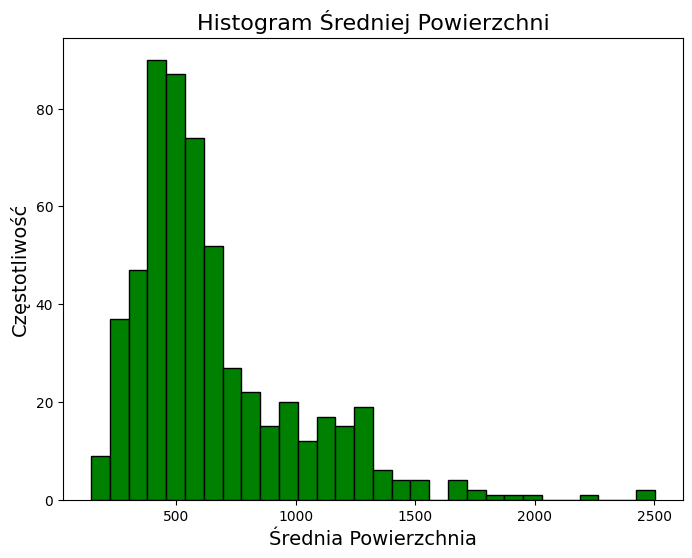

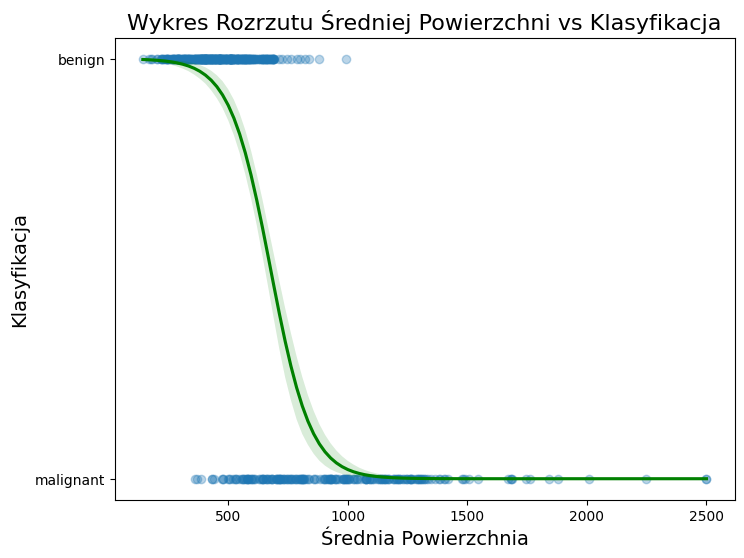

In [15]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
y = data.target
X = data.data

#łączna liczbza przypadków
total_cases = len(y)
print("Całkowita liczba przypadków:", total_cases)

#liczba przypadków złośliwego raka
num_malignant = np.sum(y)
print("Liczba przypadków złośliwego raka:", num_malignant)

#histogram średniej
mean_area = X[:, np.where(data.feature_names == 'mean area')[0][0]]
plt.figure(figsize=(8, 6))
plt.hist(mean_area, bins=30, color='green', edgecolor='black')
plt.xlabel('Średnia Powierzchnia', fontsize=14)
plt.ylabel('Częstotliwość', fontsize=14)
plt.title('Histogram Średniej Powierzchni', fontsize=16)
plt.show()

#wykres rozrzutu średniej
plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.xlabel('Średnia Powierzchnia', fontsize=14)
plt.ylabel('Klasyfikacja', fontsize=14)
plt.title('Wykres Rozrzutu Średniej Powierzchni vs Klasyfikacja', fontsize=16)
plt.yticks([0, 1], data.target_names)
plt.show()


In [16]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Access feature names
feature_names = data.feature_names

# Display column names
print("Column Names:")
print(feature_names)


Column Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
